In [1]:
# import trax
# from trax import layers as tl
# import trax.fastmath.numpy as fastnp
# from trax.supervised import training
from functools import partial
import numpy as np
from itertools import combinations
import random as rnd
from random import sample
import json
import sklearn.metrics as metrics
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import copy
import torch
import os
import warnings
from scipy.spatial import distance
from os import walk
from transformers import AutoTokenizer, AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#initialize codebert
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model_codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)
np.random.seed(777)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from os import walk

from transformers import AutoModelForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [4]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [5]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Get the count of unique values in the 'projects' column
unique_projects_counts = data['project'].value_counts()

# Filter and display the projects with more than 300 counts
filtered_projects = unique_projects_counts[unique_projects_counts > 30]
print(filtered_projects)


project
dubbo                     170
hadoop                    146
nifi                      139
junit-quickcheck          131
ormlite-core              113
admiral                   109
wildfly                    84
Mapper                     75
fastjson                   64
typescript-generator       60
Chronicle-Wire             59
Java-WebSocket             54
biojava                    51
spring-boot                48
visualee                   47
hbase                      47
innodb-java-reader         45
adyen-java-api-library     45
spring-hateoas             41
hive                       41
DataflowTemplates          39
esper                      38
spring-data-r2dbc          37
openhtmltopdf              35
nacos                      32
Name: count, dtype: int64


In [6]:
label_to_int_pre= {
    'OD': 0,
    'NIO': 1,
    'ID': 2,
    'NDOD': 3,
    'NOD': 4,
    'UD':5
}
int_to_label_pre = {
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD',
}

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame that includes all the data
# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Specify the project name you want to include
project_name = "hadoop"

# Assuming 'data' is your DataFrame that includes all the data
project_data = data[data['project'] == project_name]

# Extract the relevant fields: 'preprocessed_code' and 'category'
relevant_data = project_data[['preprocessed_code', 'category']]

# Filter the data to include only categories 1, 2, 3, and 4 (up to 5 if needed)
filtered_data = relevant_data[relevant_data['category'].isin([1, 2, 3, 4])]

# Split the data into training and validation sets, stratifying by 'category' to ensure all categories are represented
train_data, valid_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['category'])

# Mapping from integers to labels

# Replace category numbers with category labels
train_data['category'] = train_data['category'].map(int_to_label_pre)
valid_data['category'] = valid_data['category'].map(int_to_label_pre)

# Extract buggy code and categories for train and validation sets
train_buggy_code = train_data['preprocessed_code'].tolist()
valid_buggy_code = valid_data['preprocessed_code'].tolist()
train_categories = train_data['category'].tolist()
valid_categories = valid_data['category'].tolist()

# Print the splits for verification
print("Train buggy code:", len(train_buggy_code))
print("Validation buggy code:", len(valid_buggy_code))
print("Train categories:", len(train_categories))
print("Validation categories:", len(valid_categories))


Train buggy code: 116
Validation buggy code: 30
Train categories: 116
Validation categories: 30


In [8]:
print("Unique categories in training set:", set(train_categories))
print("Unique categories in validation set:", set(valid_categories))


Unique categories in training set: {'ID', 'NOD', 'NDOD', 'NIO'}
Unique categories in validation set: {'ID', 'NOD', 'NDOD', 'NIO'}


In [9]:
label_to_int= {
    'NIO': 0,
    'ID': 1,
    'NDOD': 2,
    'NOD': 3,
}

In [10]:
from torch.utils.data import Dataset
import numpy as np
import random
import torch

class SiameseDataset(Dataset):
    def __init__(self, train_buggy_code, valid_buggy_code, tokenizer, codebert, categories, split):
        self.train_buggy_code = train_buggy_code
        self.valid_buggy_code = valid_buggy_code
        self.tokenizer = tokenizer
        self.codebert = codebert.to(device)
        self.categories = categories
        self.split = split
        self.m_len = self.calculate_max_output_length()
        
        # Preprocess categories to map labels to indices
        self.label_to_indices = {}
        for index, category in enumerate(categories):
            if category not in self.label_to_indices:
                self.label_to_indices[category] = []
            self.label_to_indices[category].append(index)

        # For negative sampling
        self.labels = categories
        self.unique_labels = list(set(self.labels))
        
    def calculate_max_output_length(self):
        max_length = 0
        for code in self.train_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_train = length
        for code in self.valid_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_valid = length
        if max_length_train > max_length_valid:
            return max_length_train
        else:
            return max_length_valid

    def simulate_process_length(self, snippet):
        # Calculate how many segments would be needed
        encoded_input = self.tokenizer.encode(snippet, add_special_tokens=True)
        # Each segment processes up to 512 tokens (max length for BERT models)
        num_segments = (len(encoded_input) + 511) // 512  # 512 tokens per segment, including CLS and SEP
        return num_segments * 768
    def __len__(self):
        if self.split == 'train':
            return len(self.train_buggy_code)
        else:
            return len(self.valid_buggy_code)

    def __getitem__(self, idx):
        if self.split == 'train':
            # Anchor label
            anchor_label = self.categories[idx]

            # Positive sample
            positive_idx = idx
            while positive_idx == idx:  # Ensure different indices for anchor and positive
                positive_idx = random.choice(self.label_to_indices[anchor_label])

            # Negative sample
            negative_label = random.choice([lab for lab in self.unique_labels if lab != anchor_label])
            negative_idx = random.choice(self.label_to_indices[negative_label])

            anchor = self._process_snippet(self.train_buggy_code[idx])
            positive = self._process_snippet(self.train_buggy_code[positive_idx])
            negative = self._process_snippet(self.train_buggy_code[negative_idx])
            
            if len(anchor) <= 768:
                short_data = True
            else:
                short_data = False
                


            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'positive':torch.nn.functional.pad(positive, (0, self.m_len - positive.size(0))),
                'negative': torch.nn.functional.pad(negative, (0, self.m_len - negative.size(0))),
                'label': label_to_int[anchor_label],  # Optional, depends on how you want to use it
                'short_data_flag': short_data
            }
        elif self.split == 'val':
            anchor_label = self.categories[idx]
            anchor = self._process_snippet(self.valid_buggy_code[idx])
            
            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'label': label_to_int[anchor_label]  # Optional, depends on how you want to use it
            }

        
    def _process_snippet(self, snippet):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Tokenize input without the max_length constraint
        inputs = self.tokenizer(snippet, return_tensors='pt').to(device)

        if inputs['input_ids'].shape[1] < 512:
            with torch.no_grad():
                outs = self.codebert(**inputs)
            cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
            return cls  # Move to CPU to save GPU memory
        else:
            total_length = inputs['input_ids'].shape[1]
            parts = []
            step_size = 100
            chunk_size = 512

            for start_index in range(0, total_length, step_size):
                end_index = min(start_index + chunk_size, total_length)
                input_segment = {key: val[:, start_index:end_index].to(device) for key, val in inputs.items()}

                with torch.no_grad():
                    output_segment = self.codebert(**input_segment)
                cls_segment = output_segment.last_hidden_state[:, 0, :].squeeze().detach()
                parts.append(cls_segment)  # Move to CPU

            concatenated_parts = torch.cat(parts, dim=0)
            return concatenated_parts

In [11]:
# Create instances of the custom dataset class
train_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, train_categories, 'train')
val_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, valid_categories, 'val')

# Create dataloaders for training and validation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Print the lengths of the dataloaders for verification
print("Train dataloader length:", len(train_dataloader))
print("Validation dataloader length:", len(val_dataloader))

Token indices sequence length is longer than the specified maximum sequence length for this model (711 > 512). Running this sequence through the model will result in indexing errors


Train dataloader length: 15
Validation dataloader length: 4


In [12]:
import numpy as np

def sample_triplet_data(data, sample_size_ratio):
    """
    Samples a subset of triplet data (anchor, positive, negative) while preserving class distribution.
    
    Parameters:
    - data: list of dictionaries, where each dictionary has keys 'anchor', 'positive', 'negative', 'label'.
    - sample_size_ratio: float, the fraction of the data to sample (0 < sample_size_ratio <= 1).
    
    Returns:
    - sampled_data: list of dictionaries, the sampled subset of the original data.
    """
    # Extract labels to understand the class distribution
    labels = [item['label'] for item in data]
    unique_classes = np.unique(labels)
    
    sampled_data = []
    
    for cls in unique_classes:
        # Find all items belonging to the current class
        class_items = [item for item in data if item['label'] == cls]
        # Calculate the number of items to sample from this class
        num_samples = int(np.ceil(len(class_items) * sample_size_ratio))
        # Randomly sample items without replacement
        sampled_items = np.random.choice(class_items, size=num_samples, replace=False)
        # Append the sampled items to the output list
        sampled_data.extend(sampled_items)
    
    # Optionally, shuffle the sampled dataset to mix classes
    np.random.shuffle(sampled_data)

    return sampled_data


In [13]:
import gc
from tqdm import tqdm
plot_data = []
plot_labels = []
short_data_flags = []
for item in tqdm(train_dataset):
    
    plot_data.append(item['anchor'])
    plot_labels.append(item['label'])
    short_data_flags.append(item['short_data_flag'])

 22%|██▏       | 25/116 [00:00<00:01, 71.46it/s]

100%|██████████| 116/116 [00:01<00:00, 60.88it/s]


In [14]:
m_len = plot_data[0].shape[0]

In [15]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']  
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
cc = LinearSegmentedColormap.from_list("cc", colors, N=5)


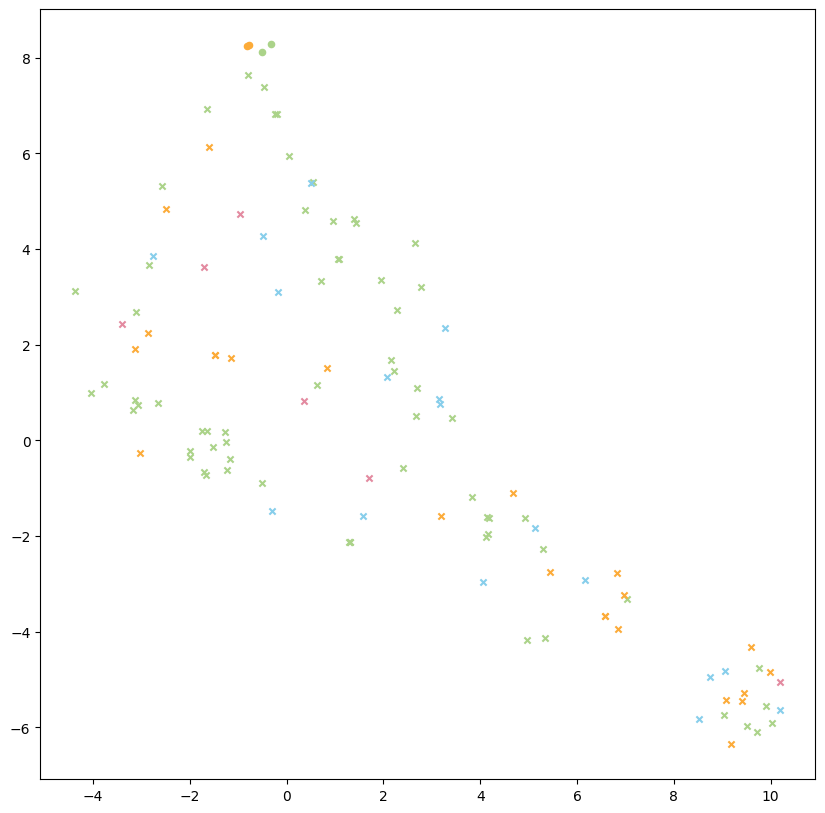

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import numpy as np

# Assuming X, plot_data, and plot_labels are defined as before
# Also assuming bool_values is your list/array of boolean values

X = torch.stack(plot_data).cpu().numpy()

# Extract labels for each point
labelsNums = plot_labels

# Perform t-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

# Assuming 'cc' is a colormap, you might need to adjust this to fit your actual colormap variable
# Generate an array of colors for each label
unique_labels = np.unique(labelsNums)
colors = plt.cm.get_cmap(cc, len(unique_labels))  # Adjust 'cc' as needed to your colormap name
label_to_color = {label: colors(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
colors_array = np.array([label_to_color[label] for label in labelsNums])

# Create the scatter plot
plt.figure(figsize=(10, 10))

# Iterate through each datapoint
for i in range(len(X_embedded)):
    marker = 'x' if short_data_flags[i] else 'o'  # Choose the marker based on the boolean value
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors_array[i], s=20, alpha=1, marker=marker)

# Set the background color to black
# plt.gca().set_facecolor('white')
# # Adjust the color of the ticks and labels for better visibility
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.xlabel('Component 1', color='white')
# plt.ylabel('Component 2', color='white')

plt.show()


In [17]:
# Load the CodeBERT tokenizer (adjust the model_name as needed)
model_name = "microsoft/codebert-base"
codebert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_size, int(embedding_size/2)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/2), int(embedding_size/4)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/4), embedding_size)
        )

    def forward(self, x):
        output = self.fc(x)
        return output

In [18]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [19]:
learning_rate = 1e-5
num_epochs = 450
embed_size = m_len  # This should match the output size of CodeBERT
siamese_network = SiameseNetwork(embed_size).to(device)
criterion = TripletLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=learning_rate)
triplet_loss = TripletLoss().to(device)

In [20]:
# from transformers import get_linear_schedule_with_warmup
# warmup_Frac = 0.1
# total_iter = num_epochs * len(train_dataloader)
# scheduler = get_linear_schedule_with_warmup(optimizer, int(warmup_Frac * total_iter), total_iter)

In [67]:
from tqdm import tqdm
best_loss = 100.0
num_epochs = 200
epoch_loss_list = []
model_name = "FlakyXbert_IDoFT_project_" + project_name + '_final.pth'
for epoch in range(num_epochs):
    total_loss = 0.0
    siamese_network.train()
    for batch in tqdm(train_dataloader):

        labels = (batch['label']).to(device)
        batch_anchor = (batch['anchor']).to(device)
        batch_positive = (batch['positive']).to(device)
        batch_negative = (batch['negative']).to(device)

        anchor_output = siamese_network(batch_anchor)
        positive_out = siamese_network(batch_positive)
        negative_out = siamese_network(batch_negative)

        loss = criterion(anchor_output, positive_out, negative_out)
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(siamese_network.parameters(), max_norm=2.0)        
        optimizer.step()
        # scheduler.step()

        total_loss += loss.item()
        if total_loss <= best_loss:
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
            print("Loss improved saving model")
            torch.save(siamese_network.state_dict(), model_name)
            best_loss = total_loss
        
            
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    # The line `epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")` is attempting to append a formatted string to a list named `epoch_loss_list`. This string contains information about the current epoch number, total number of epochs, and the average loss calculated for that epoch. However, in the provided code snippet, the `epoch_loss_list` list is not defined or used anywhere else in the code.
    epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    

 13%|█▎        | 2/15 [00:00<00:03,  4.24it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.94it/s]


Epoch 1/200, Loss: 0.12333824634552001


100%|██████████| 15/15 [00:02<00:00,  6.39it/s]


Epoch 2/200, Loss: 0.18073259989420573


100%|██████████| 15/15 [00:01<00:00, 10.04it/s]


Epoch 3/200, Loss: 0.14930624961853028


100%|██████████| 15/15 [00:02<00:00,  7.36it/s]


Epoch 4/200, Loss: 0.11681618541479111


100%|██████████| 15/15 [00:01<00:00,  8.61it/s]


Epoch 5/200, Loss: 0.14510500232378643


100%|██████████| 15/15 [00:01<00:00,  7.72it/s]


Epoch 6/200, Loss: 0.1088339333732923


100%|██████████| 15/15 [00:01<00:00,  9.83it/s]


Epoch 7/200, Loss: 0.12680354615052541


100%|██████████| 15/15 [00:01<00:00,  9.92it/s]


Epoch 8/200, Loss: 0.10330638289451599


100%|██████████| 15/15 [00:01<00:00,  9.17it/s]


Epoch 9/200, Loss: 0.145293228328228


100%|██████████| 15/15 [00:01<00:00,  9.10it/s]


Epoch 10/200, Loss: 0.21517286797364552


100%|██████████| 15/15 [00:01<00:00,  7.63it/s]


Epoch 11/200, Loss: 0.12217142979303995


100%|██████████| 15/15 [00:02<00:00,  7.06it/s]


Epoch 12/200, Loss: 0.16660211235284805


100%|██████████| 15/15 [00:01<00:00,  8.94it/s]


Epoch 13/200, Loss: 0.1704078714052836


100%|██████████| 15/15 [00:01<00:00,  8.45it/s]


Epoch 14/200, Loss: 0.08754949371019999


100%|██████████| 15/15 [00:02<00:00,  5.97it/s]


Epoch 15/200, Loss: 0.172391813993454


 13%|█▎        | 2/15 [00:00<00:01, 12.87it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.11it/s]


Epoch 16/200, Loss: 0.12424452304840088


100%|██████████| 15/15 [00:01<00:00,  7.66it/s]


Epoch 17/200, Loss: 0.14764847457408906


100%|██████████| 15/15 [00:01<00:00, 11.72it/s]


Epoch 18/200, Loss: 0.08300361235936483


100%|██████████| 15/15 [00:02<00:00,  7.25it/s]


Epoch 19/200, Loss: 0.15554967919985455


100%|██████████| 15/15 [00:02<00:00,  5.97it/s]


Epoch 20/200, Loss: 0.1566337843736013


 13%|█▎        | 2/15 [00:00<00:00, 16.03it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.80it/s]


Epoch 21/200, Loss: 0.1726214200258255


100%|██████████| 15/15 [00:02<00:00,  6.73it/s]


Epoch 22/200, Loss: 0.15828681687513987


  7%|▋         | 1/15 [00:00<00:02,  4.88it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.19it/s]


Epoch 23/200, Loss: 0.09047932922840118


100%|██████████| 15/15 [00:02<00:00,  6.89it/s]


Epoch 24/200, Loss: 0.12413705090681712


100%|██████████| 15/15 [00:02<00:00,  6.90it/s]


Epoch 25/200, Loss: 0.14520651698112488


100%|██████████| 15/15 [00:01<00:00,  9.72it/s]


Epoch 26/200, Loss: 0.11886550784111023


100%|██████████| 15/15 [00:01<00:00,  8.83it/s]


Epoch 27/200, Loss: 0.09078015834093094


100%|██████████| 15/15 [00:01<00:00,  7.83it/s]


Epoch 28/200, Loss: 0.1087300365169843


100%|██████████| 15/15 [00:01<00:00,  9.60it/s]


Epoch 29/200, Loss: 0.14708242317040762


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:01,  7.27it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.75it/s]


Epoch 30/200, Loss: 0.11957752853631973


100%|██████████| 15/15 [00:01<00:00, 12.20it/s]


Epoch 31/200, Loss: 0.10367983927329381


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.60it/s]


Epoch 32/200, Loss: 0.1062779982884725


  7%|▋         | 1/15 [00:00<00:04,  2.88it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.85it/s]


Epoch 33/200, Loss: 0.18570809016625087


100%|██████████| 15/15 [00:01<00:00,  8.88it/s]


Epoch 34/200, Loss: 0.12795979032913843


100%|██████████| 15/15 [00:01<00:00,  9.26it/s]


Epoch 35/200, Loss: 0.20688072144985198


  7%|▋         | 1/15 [00:00<00:02,  5.13it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:02,  4.96it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.77it/s]


Epoch 36/200, Loss: 0.06845555106798808


100%|██████████| 15/15 [00:01<00:00,  9.78it/s]


Epoch 37/200, Loss: 0.11504263828198115


100%|██████████| 15/15 [00:01<00:00,  7.79it/s]


Epoch 38/200, Loss: 0.09926031430562338


100%|██████████| 15/15 [00:02<00:00,  7.08it/s]


Epoch 39/200, Loss: 0.12550959140062332


 13%|█▎        | 2/15 [00:00<00:00, 13.47it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.82it/s]


Epoch 40/200, Loss: 0.15340185910463333


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.08it/s]


Epoch 41/200, Loss: 0.0997619370619456


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.59it/s]


Epoch 42/200, Loss: 0.1664566511909167


100%|██████████| 15/15 [00:01<00:00,  8.91it/s]


Epoch 43/200, Loss: 0.10492828637361526


100%|██████████| 15/15 [00:02<00:00,  7.19it/s]


Epoch 44/200, Loss: 0.15552632262309393


100%|██████████| 15/15 [00:01<00:00,  8.07it/s]


Epoch 45/200, Loss: 0.13227469126383465


100%|██████████| 15/15 [00:01<00:00,  8.86it/s]


Epoch 46/200, Loss: 0.13781398634115855


100%|██████████| 15/15 [00:01<00:00,  8.87it/s]


Epoch 47/200, Loss: 0.10998758375644684


100%|██████████| 15/15 [00:01<00:00,  7.82it/s]


Epoch 48/200, Loss: 0.15011454820632936


100%|██████████| 15/15 [00:01<00:00,  8.33it/s]


Epoch 49/200, Loss: 0.17613727748394012


100%|██████████| 15/15 [00:01<00:00,  8.30it/s]


Epoch 50/200, Loss: 0.1259264811873436


100%|██████████| 15/15 [00:01<00:00,  8.34it/s]


Epoch 51/200, Loss: 0.07063981841007869


100%|██████████| 15/15 [00:02<00:00,  7.34it/s]


Epoch 52/200, Loss: 0.13404086728890738


100%|██████████| 15/15 [00:01<00:00,  9.18it/s]


Epoch 53/200, Loss: 0.0739177867770195


100%|██████████| 15/15 [00:01<00:00,  8.95it/s]


Epoch 54/200, Loss: 0.14324138909578324


100%|██████████| 15/15 [00:01<00:00,  8.91it/s]


Epoch 55/200, Loss: 0.11523222674926122


100%|██████████| 15/15 [00:01<00:00,  8.26it/s]


Epoch 56/200, Loss: 0.10771464258432388


100%|██████████| 15/15 [00:01<00:00,  7.57it/s]


Epoch 57/200, Loss: 0.12143847942352295


  7%|▋         | 1/15 [00:00<00:02,  4.86it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.97it/s]


Epoch 58/200, Loss: 0.1390955607096354


  7%|▋         | 1/15 [00:00<00:02,  5.18it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.21it/s]


Epoch 59/200, Loss: 0.11639454464117686


100%|██████████| 15/15 [00:01<00:00,  8.22it/s]


Epoch 60/200, Loss: 0.1412707547346751


100%|██████████| 15/15 [00:01<00:00,  9.68it/s]


Epoch 61/200, Loss: 0.12408005197842915


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.76it/s]


Epoch 62/200, Loss: 0.2091425433754921


  7%|▋         | 1/15 [00:00<00:02,  5.14it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.03it/s]


Epoch 63/200, Loss: 0.07708516915639242


100%|██████████| 15/15 [00:01<00:00,  9.70it/s]


Epoch 64/200, Loss: 0.10403161644935607


100%|██████████| 15/15 [00:01<00:00,  9.60it/s]


Epoch 65/200, Loss: 0.08309643069903055


  7%|▋         | 1/15 [00:00<00:02,  4.84it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.59it/s]


Epoch 66/200, Loss: 0.09216376493374506


 13%|█▎        | 2/15 [00:00<00:00, 13.81it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.02it/s]


Epoch 67/200, Loss: 0.1038757195075353


100%|██████████| 15/15 [00:01<00:00,  8.85it/s]


Epoch 68/200, Loss: 0.10864187677701315


100%|██████████| 15/15 [00:01<00:00,  8.87it/s]


Epoch 69/200, Loss: 0.05593399455149969


100%|██████████| 15/15 [00:01<00:00,  8.33it/s]


Epoch 70/200, Loss: 0.13051340579986573


100%|██████████| 15/15 [00:01<00:00, 11.01it/s]


Epoch 71/200, Loss: 0.10298913915952047


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.34it/s]


Epoch 72/200, Loss: 0.11108695864677429


100%|██████████| 15/15 [00:01<00:00, 10.81it/s]


Epoch 73/200, Loss: 0.09011220335960388


100%|██████████| 15/15 [00:02<00:00,  7.05it/s]


Epoch 74/200, Loss: 0.09768826216459274


100%|██████████| 15/15 [00:01<00:00,  9.12it/s]


Epoch 75/200, Loss: 0.10046529670556387


100%|██████████| 15/15 [00:01<00:00, 10.44it/s]


Epoch 76/200, Loss: 0.13984607060750326


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.15it/s]


Epoch 77/200, Loss: 0.13175291270017625


  7%|▋         | 1/15 [00:00<00:02,  4.87it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


Epoch 78/200, Loss: 0.12908121099074682


100%|██████████| 15/15 [00:01<00:00, 12.29it/s]


Epoch 79/200, Loss: 0.10164089997609456


100%|██████████| 15/15 [00:02<00:00,  7.27it/s]


Epoch 80/200, Loss: 0.084365680317084


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.68it/s]


Epoch 81/200, Loss: 0.12513511031866073


100%|██████████| 15/15 [00:02<00:00,  7.11it/s]


Epoch 82/200, Loss: 0.0823636179169019


100%|██████████| 15/15 [00:01<00:00,  7.60it/s]


Epoch 83/200, Loss: 0.0720332274834315


 13%|█▎        | 2/15 [00:00<00:00, 13.73it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.73it/s]


Epoch 84/200, Loss: 0.07698349803686141


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.73it/s]


Epoch 85/200, Loss: 0.12866632839043934


 13%|█▎        | 2/15 [00:00<00:00, 15.40it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.65it/s]


Epoch 86/200, Loss: 0.12672087252140046


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00, 10.41it/s]


Epoch 87/200, Loss: 0.061970080931981406


100%|██████████| 15/15 [00:01<00:00, 10.53it/s]


Epoch 88/200, Loss: 0.13267774085203807


100%|██████████| 15/15 [00:01<00:00,  9.09it/s]


Epoch 89/200, Loss: 0.1213322713971138


100%|██████████| 15/15 [00:01<00:00,  8.36it/s]


Epoch 90/200, Loss: 0.06325544267892838


  7%|▋         | 1/15 [00:00<00:02,  5.21it/s]

Loss improved saving model


 20%|██        | 3/15 [00:00<00:01,  8.83it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.81it/s]


Epoch 91/200, Loss: 0.06268982191880544


 13%|█▎        | 2/15 [00:00<00:01, 12.61it/s]

Loss improved saving model
Loss improved saving model


 27%|██▋       | 4/15 [00:00<00:01,  9.11it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.40it/s]


Epoch 92/200, Loss: 0.12253713061412176


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:01,  7.73it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.81it/s]


Epoch 93/200, Loss: 0.10302854677041372


100%|██████████| 15/15 [00:01<00:00,  7.85it/s]


Epoch 94/200, Loss: 0.12225608627001444


100%|██████████| 15/15 [00:01<00:00, 10.36it/s]


Epoch 95/200, Loss: 0.07658211588859558


 13%|█▎        | 2/15 [00:00<00:00, 15.56it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.68it/s]


Epoch 96/200, Loss: 0.1043407733241717


100%|██████████| 15/15 [00:01<00:00,  9.47it/s]


Epoch 97/200, Loss: 0.12903642455736797


100%|██████████| 15/15 [00:02<00:00,  7.39it/s]


Epoch 98/200, Loss: 0.10135760853687922


  7%|▋         | 1/15 [00:00<00:01,  8.65it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.04it/s]


Epoch 99/200, Loss: 0.07810536225636801


100%|██████████| 15/15 [00:01<00:00, 10.25it/s]


Epoch 100/200, Loss: 0.17732026278972626


100%|██████████| 15/15 [00:01<00:00,  9.41it/s]


Epoch 101/200, Loss: 0.09987951070070267


100%|██████████| 15/15 [00:01<00:00,  8.19it/s]


Epoch 102/200, Loss: 0.11106231758991877


100%|██████████| 15/15 [00:01<00:00,  7.75it/s]


Epoch 103/200, Loss: 0.10956393678983052


 20%|██        | 3/15 [00:00<00:01,  6.12it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.54it/s]


Epoch 104/200, Loss: 0.07443789194027582


  7%|▋         | 1/15 [00:00<00:04,  3.04it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  5.58it/s]


Epoch 105/200, Loss: 0.12051336914300918


100%|██████████| 15/15 [00:01<00:00,  9.68it/s]


Epoch 106/200, Loss: 0.07093733300765355


  7%|▋         | 1/15 [00:00<00:02,  4.90it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.06it/s]


Epoch 107/200, Loss: 0.06646075149377187


100%|██████████| 15/15 [00:02<00:00,  7.35it/s]


Epoch 108/200, Loss: 0.08890417665243149


100%|██████████| 15/15 [00:01<00:00,  7.69it/s]


Epoch 109/200, Loss: 0.04294513215621312


  7%|▋         | 1/15 [00:00<00:02,  4.82it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.42it/s]


Epoch 110/200, Loss: 0.10729982157548269


  7%|▋         | 1/15 [00:00<00:03,  3.89it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.19it/s]


Epoch 111/200, Loss: 0.08756985714038214


 13%|█▎        | 2/15 [00:00<00:00, 13.23it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.32it/s]


Epoch 112/200, Loss: 0.1103844776749611


100%|██████████| 15/15 [00:01<00:00,  7.66it/s]


Epoch 113/200, Loss: 0.07360782672961554


 13%|█▎        | 2/15 [00:00<00:00, 13.15it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.81it/s]


Epoch 114/200, Loss: 0.10286198854446411


 13%|█▎        | 2/15 [00:00<00:00, 15.28it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00, 12.14it/s]


Epoch 115/200, Loss: 0.07543355574210485


100%|██████████| 15/15 [00:01<00:00,  9.65it/s]


Epoch 116/200, Loss: 0.08016028354565302


100%|██████████| 15/15 [00:01<00:00,  7.84it/s]


Epoch 117/200, Loss: 0.11566201845804851


100%|██████████| 15/15 [00:01<00:00,  9.47it/s]


Epoch 118/200, Loss: 0.12491828252871831


100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Epoch 119/200, Loss: 0.03144692083199819


100%|██████████| 15/15 [00:01<00:00,  8.02it/s]


Epoch 120/200, Loss: 0.04900186111529668


100%|██████████| 15/15 [00:02<00:00,  7.01it/s]


Epoch 121/200, Loss: 0.11880245208740234


 13%|█▎        | 2/15 [00:00<00:00, 16.39it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.56it/s]


Epoch 122/200, Loss: 0.0800545021891594


100%|██████████| 15/15 [00:01<00:00,  8.46it/s]


Epoch 123/200, Loss: 0.08425450026988983


 13%|█▎        | 2/15 [00:00<00:00, 15.30it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.18it/s]


Epoch 124/200, Loss: 0.05619766861200333


100%|██████████| 15/15 [00:02<00:00,  6.63it/s]


Epoch 125/200, Loss: 0.07964564313491186


 13%|█▎        | 2/15 [00:00<00:00, 13.43it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.98it/s]


Epoch 126/200, Loss: 0.09849240332841873


 20%|██        | 3/15 [00:00<00:01,  9.53it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.78it/s]


Epoch 127/200, Loss: 0.085621644059817


100%|██████████| 15/15 [00:01<00:00,  9.28it/s]


Epoch 128/200, Loss: 0.07502912431955337


100%|██████████| 15/15 [00:01<00:00,  7.69it/s]


Epoch 129/200, Loss: 0.06500704089800517


  7%|▋         | 1/15 [00:00<00:02,  5.09it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.73it/s]


Epoch 130/200, Loss: 0.05804101129372915


100%|██████████| 15/15 [00:01<00:00,  8.03it/s]


Epoch 131/200, Loss: 0.0853997493783633


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.17it/s]


Epoch 132/200, Loss: 0.07226312011480332


100%|██████████| 15/15 [00:01<00:00,  7.74it/s]


Epoch 133/200, Loss: 0.05884951551755269


100%|██████████| 15/15 [00:01<00:00,  7.94it/s]


Epoch 134/200, Loss: 0.088686241209507


100%|██████████| 15/15 [00:01<00:00,  8.83it/s]


Epoch 135/200, Loss: 0.0628970871369044


100%|██████████| 15/15 [00:01<00:00, 10.81it/s]


Epoch 136/200, Loss: 0.07609149912993113


100%|██████████| 15/15 [00:01<00:00,  9.58it/s]


Epoch 137/200, Loss: 0.11392880231142044


100%|██████████| 15/15 [00:01<00:00, 10.52it/s]


Epoch 138/200, Loss: 0.10918033868074417


100%|██████████| 15/15 [00:01<00:00,  8.07it/s]


Epoch 139/200, Loss: 0.07149609476327896


100%|██████████| 15/15 [00:01<00:00,  7.59it/s]


Epoch 140/200, Loss: 0.04085709899663925


100%|██████████| 15/15 [00:02<00:00,  6.41it/s]


Epoch 141/200, Loss: 0.07798215299844742


 13%|█▎        | 2/15 [00:00<00:00, 15.61it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:01<00:00, 10.03it/s]


Epoch 142/200, Loss: 0.0573730597893397


  7%|▋         | 1/15 [00:00<00:03,  3.91it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00, 10.29it/s]


Epoch 143/200, Loss: 0.13615921686093013


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:01,  7.77it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:01<00:00, 10.02it/s]


Epoch 144/200, Loss: 0.09169301937023798


100%|██████████| 15/15 [00:01<00:00,  7.55it/s]


Epoch 145/200, Loss: 0.0928851917386055


 13%|█▎        | 2/15 [00:00<00:00, 15.61it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.15it/s]


Epoch 146/200, Loss: 0.06681207766135534


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:02,  4.90it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.54it/s]


Epoch 147/200, Loss: 0.04976633737484614


100%|██████████| 15/15 [00:01<00:00,  7.67it/s]


Epoch 148/200, Loss: 0.0849811131755511


100%|██████████| 15/15 [00:01<00:00,  8.84it/s]


Epoch 149/200, Loss: 0.05970389445622762


100%|██████████| 15/15 [00:01<00:00,  7.97it/s]


Epoch 150/200, Loss: 0.08971322178840638


100%|██████████| 15/15 [00:01<00:00,  7.83it/s]


Epoch 151/200, Loss: 0.12698372354110082


  7%|▋         | 1/15 [00:00<00:02,  5.13it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.97it/s]


Epoch 152/200, Loss: 0.08392731597026189


  7%|▋         | 1/15 [00:00<00:04,  2.91it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.39it/s]


Epoch 153/200, Loss: 0.060948160290718076


  7%|▋         | 1/15 [00:00<00:02,  5.07it/s]

Loss improved saving model


 20%|██        | 3/15 [00:00<00:01, 10.14it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.90it/s]


Epoch 154/200, Loss: 0.06947054515282312


 13%|█▎        | 2/15 [00:00<00:00, 16.23it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.94it/s]


Epoch 155/200, Loss: 0.0651935562491417


100%|██████████| 15/15 [00:01<00:00, 10.96it/s]


Epoch 156/200, Loss: 0.09484233359495799


100%|██████████| 15/15 [00:01<00:00,  9.17it/s]


Epoch 157/200, Loss: 0.0980653057495753


100%|██████████| 15/15 [00:02<00:00,  7.18it/s]


Epoch 158/200, Loss: 0.04427951773007711


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.52it/s]


Epoch 159/200, Loss: 0.03169400095939636


100%|██████████| 15/15 [00:01<00:00,  8.46it/s]


Epoch 160/200, Loss: 0.0621592919031779


100%|██████████| 15/15 [00:01<00:00,  7.64it/s]


Epoch 161/200, Loss: 0.08113256047169368


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:01,  7.77it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.97it/s]


Epoch 162/200, Loss: 0.07613158822059632


100%|██████████| 15/15 [00:01<00:00,  8.49it/s]


Epoch 163/200, Loss: 0.07648720890283585


100%|██████████| 15/15 [00:01<00:00,  9.00it/s]


Epoch 164/200, Loss: 0.06249508062998454


100%|██████████| 15/15 [00:02<00:00,  6.91it/s]


Epoch 165/200, Loss: 0.08946644167105357


 13%|█▎        | 2/15 [00:00<00:00, 13.60it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00, 10.50it/s]


Epoch 166/200, Loss: 0.05991060882806778


  7%|▋         | 1/15 [00:00<00:04,  3.08it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.00it/s]


Epoch 167/200, Loss: 0.051602948208649954


  7%|▋         | 1/15 [00:00<00:02,  5.23it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.41it/s]


Epoch 168/200, Loss: 0.08584712892770767


100%|██████████| 15/15 [00:02<00:00,  7.32it/s]


Epoch 169/200, Loss: 0.058727299173672996


 13%|█▎        | 2/15 [00:00<00:00, 15.10it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.41it/s]


Epoch 170/200, Loss: 0.05229289432366689


100%|██████████| 15/15 [00:01<00:00,  8.62it/s]


Epoch 171/200, Loss: 0.06689628461996715


100%|██████████| 15/15 [00:01<00:00,  8.25it/s]


Epoch 172/200, Loss: 0.06507634917894999


 13%|█▎        | 2/15 [00:00<00:00, 15.80it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.06it/s]


Epoch 173/200, Loss: 0.08360943794250489


100%|██████████| 15/15 [00:02<00:00,  5.83it/s]


Epoch 174/200, Loss: 0.09095578044652938


100%|██████████| 15/15 [00:01<00:00,  8.01it/s]


Epoch 175/200, Loss: 0.03515953570604324


100%|██████████| 15/15 [00:01<00:00,  9.12it/s]


Epoch 176/200, Loss: 0.07831687728563945


100%|██████████| 15/15 [00:02<00:00,  6.94it/s]


Epoch 177/200, Loss: 0.05107099612553914


100%|██████████| 15/15 [00:02<00:00,  5.83it/s]


Epoch 178/200, Loss: 0.06381582021713257


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  9.19it/s]


Epoch 179/200, Loss: 0.05315816650787989


  7%|▋         | 1/15 [00:00<00:02,  4.94it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.29it/s]


Epoch 180/200, Loss: 0.07939606606960296


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:01,  7.11it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.56it/s]


Epoch 181/200, Loss: 0.03155174255371094


100%|██████████| 15/15 [00:01<00:00,  7.98it/s]


Epoch 182/200, Loss: 0.033920487264792125


 13%|█▎        | 2/15 [00:00<00:02,  4.81it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.67it/s]


Epoch 183/200, Loss: 0.07086653113365174


100%|██████████| 15/15 [00:01<00:00,  8.50it/s]


Epoch 184/200, Loss: 0.039514900247255964


100%|██████████| 15/15 [00:02<00:00,  6.82it/s]


Epoch 185/200, Loss: 0.04723758647839228


  0%|          | 0/15 [00:00<?, ?it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:02,  6.31it/s]

Loss improved saving model


 20%|██        | 3/15 [00:00<00:02,  5.33it/s]

Loss improved saving model


 40%|████      | 6/15 [00:00<00:01,  7.64it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.12it/s]


Epoch 186/200, Loss: 0.04778402994076411


  7%|▋         | 1/15 [00:00<00:02,  4.81it/s]

Loss improved saving model
Loss improved saving model


 33%|███▎      | 5/15 [00:00<00:01,  8.66it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  8.18it/s]


Epoch 187/200, Loss: 0.05459064245223999


  7%|▋         | 1/15 [00:00<00:03,  4.53it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.41it/s]


Epoch 188/200, Loss: 0.06244897147019704


100%|██████████| 15/15 [00:01<00:00,  8.84it/s]


Epoch 189/200, Loss: 0.07209808677434922


100%|██████████| 15/15 [00:01<00:00,  8.51it/s]


Epoch 190/200, Loss: 0.052695329487323764


100%|██████████| 15/15 [00:01<00:00, 10.07it/s]


Epoch 191/200, Loss: 0.0438635324438413


100%|██████████| 15/15 [00:01<00:00,  9.02it/s]


Epoch 192/200, Loss: 0.0686536818742752


  7%|▋         | 1/15 [00:00<00:02,  5.13it/s]

Loss improved saving model


 13%|█▎        | 2/15 [00:00<00:02,  5.11it/s]

Loss improved saving model


 27%|██▋       | 4/15 [00:00<00:01,  8.24it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.73it/s]


Epoch 193/200, Loss: 0.04857723315556844


 20%|██        | 3/15 [00:00<00:01,  8.57it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  6.76it/s]


Epoch 194/200, Loss: 0.020530356963475545


  7%|▋         | 1/15 [00:00<00:04,  3.11it/s]

Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  5.65it/s]


Epoch 195/200, Loss: 0.038832989831765495


100%|██████████| 15/15 [00:01<00:00,  8.97it/s]


Epoch 196/200, Loss: 0.09434362302223841


 20%|██        | 3/15 [00:00<00:01,  9.23it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


 33%|███▎      | 5/15 [00:00<00:00, 10.99it/s]

Loss improved saving model


100%|██████████| 15/15 [00:01<00:00,  7.68it/s]


Epoch 197/200, Loss: 0.045639850199222565


100%|██████████| 15/15 [00:01<00:00,  7.87it/s]


Epoch 198/200, Loss: 0.08190763493378957


100%|██████████| 15/15 [00:02<00:00,  7.33it/s]


Epoch 199/200, Loss: 0.07524063438177109


 13%|█▎        | 2/15 [00:00<00:00, 16.74it/s]

Loss improved saving model
Loss improved saving model


 27%|██▋       | 4/15 [00:00<00:01,  9.27it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 15/15 [00:02<00:00,  7.39it/s]

Epoch 200/200, Loss: 0.05331979095935822


In [68]:
epoch_loss_list[-50:-20]

['Epoch 151/200, Loss: 0.12698372354110082',
 'Epoch 152/200, Loss: 0.08392731597026189',
 'Epoch 153/200, Loss: 0.060948160290718076',
 'Epoch 154/200, Loss: 0.06947054515282312',
 'Epoch 155/200, Loss: 0.0651935562491417',
 'Epoch 156/200, Loss: 0.09484233359495799',
 'Epoch 157/200, Loss: 0.0980653057495753',
 'Epoch 158/200, Loss: 0.04427951773007711',
 'Epoch 159/200, Loss: 0.03169400095939636',
 'Epoch 160/200, Loss: 0.0621592919031779',
 'Epoch 161/200, Loss: 0.08113256047169368',
 'Epoch 162/200, Loss: 0.07613158822059632',
 'Epoch 163/200, Loss: 0.07648720890283585',
 'Epoch 164/200, Loss: 0.06249508062998454',
 'Epoch 165/200, Loss: 0.08946644167105357',
 'Epoch 166/200, Loss: 0.05991060882806778',
 'Epoch 167/200, Loss: 0.051602948208649954',
 'Epoch 168/200, Loss: 0.08584712892770767',
 'Epoch 169/200, Loss: 0.058727299173672996',
 'Epoch 170/200, Loss: 0.05229289432366689',
 'Epoch 171/200, Loss: 0.06689628461996715',
 'Epoch 172/200, Loss: 0.06507634917894999',
 'Epoch 17

In [69]:
siamese_network.load_state_dict(torch.load(model_name))


<All keys matched successfully>

In [70]:
siamese_network.to(device).eval()
post_train_embed = []
post_train_label = []
with torch.no_grad():
    for item in tqdm(train_dataset):
        post_train_embed.append(siamese_network(item['anchor']))
        post_train_label.append(item['label'])

100%|██████████| 116/116 [00:01<00:00, 74.91it/s]


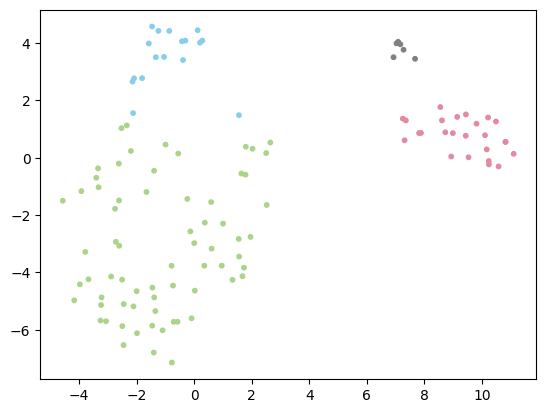

In [71]:
%matplotlib inline

X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label
X_embedded= TSNE(n_components=2, init='random').fit_transform(X_np)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1] , c=labelsNums[:len(X_embedded)], s=10, cmap= cc , alpha=1 )


In [72]:
def clsembed(snippet):
    inputs = tokenizer(snippet, padding='max_length', max_length=218, truncation=True, return_tensors='pt').to(device)
    #tokens = [self.tokenizer.cls_token] + inputs  + [self.tokenizer.sep_token]
    if(len(inputs)<512):
        with torch.no_grad():
            outs = model_codebert(**inputs)
        cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
        return cls
    else:
        print('longtest')
        i = 0
        part_vector =  []
        while ( i < len(inputs)-200) :
            #tokens = [self.tokenizer.cls_token] + inputs[i:i+250] +[self.tokenizer.sep_token]
            #tokens_ids= self.tokenizer.convert_tokens_to_ids(tokens)
            input_seg = [tokenizer.cls_token] + inputs[i:i+250] +[tokenizer.sep_token]
            with torch.no_grad():
                ots = model_codebert(**input_seg)
            cls = ots.last_hidden_state[:, 0, :].squeeze().detach()
            #cls = model_codebert(torch.tensor(inputs)[None,:])[1]
            #vector = cls[0].detach().numpy()
            parts.append(cls)
            i = i+100
        return parts

In [73]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
#labels_all = ['async wait','unordered collections','concurrency','time']
def get_class_rep(post_train_embed, post_train_label):
    # Move each tensor to CPU, convert to numpy, and collect in a list
    #post_train_embed = [x.cpu().numpy() for x in post_train_embed]
    # If you want to combine them into a single array (assuming they have the same shape)
    #post_train_embed = np.concatenate(post_train_embed, axis=0)
    representatives = [None] * 4
    for label in range(4):
        indices = np.where(np.atleast_1d(post_train_label) == label)[0]  # Get the indices as an array
        class_vectors = [post_train_embed[i] for i in indices]  # Access each index individually
        class_vectors = [x.cpu().numpy() for x in class_vectors]
        representatives[label] = np.mean(class_vectors, axis=0)
    return representatives

def calculate_normalized_distance(vec1, vec2):
    # Ensure vec1 and vec2 are numpy arrays
    if not isinstance(vec1, np.ndarray):
        vec1 = vec1.cpu().detach().numpy()
    if not isinstance(vec2, np.ndarray):
        vec2 = vec2.cpu().detach().numpy()
    
    # Normalize each vector to have unit length
    norm_vec1 = vec1 / np.linalg.norm(vec1)
    norm_vec2 = vec2 / np.linalg.norm(vec2)
    
    # Calculate Euclidean (L2) distance between the normalized vectors
    distance = np.linalg.norm(norm_vec1 - norm_vec2)
    
    return distance


In [74]:
int_to_label={
    0: 'NIO',
    1: 'ID',
    2: 'NDOD',
    3: 'NOD',
}


def get_closest_cluster(cluster_representatives, projected_vector):
    distances = [calculate_normalized_distance(rep, projected_vector) for rep in cluster_representatives]
    for i in range(len(distances)):
        distances[i] = np.mean(distances[i])
    closest_cluster_idx = np.argmin(distances)
    return int_to_label[closest_cluster_idx]

In [75]:
embed = post_train_embed
labels = post_train_label
def predict(input_vector):
    modified_vector = siamese_network(input_vector)
    representatives = get_class_rep(embed, labels)
    return get_closest_cluster(representatives, modified_vector)
    


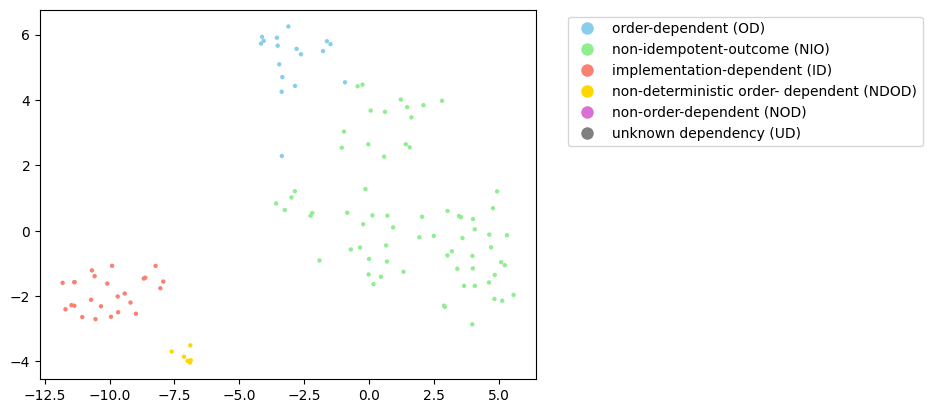

In [76]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed and post_train_label are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label

# Define vibrant colors for each category (same as used in the bar plot)
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Ensure labels are within the range of colors [0, 1, 2, 3, 4]
# Filter out invalid labels (-1) and keep only valid labels [0, 1, 2, 3, 4]
valid_indices = [i for i, label in enumerate(labelsNums) if label in [0, 1, 2, 3]]
X_np_filtered = X_np[valid_indices]
labelsNums_filtered = [labelsNums[i] for i in valid_indices]

# Dimensionality reduction with t-SNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np_filtered)

# Scatter plot
for i, label in enumerate(labelsNums_filtered):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[label], s=10, alpha=1, edgecolor='none', marker='o')

# Create legend with category labels
legend_labels = ['order-dependent (OD)', 'non-idempotent-outcome (NIO)', 'implementation-dependent (ID)', 'non-deterministic order- dependent (NDOD)', 'non-order-dependent (NOD)', 'unknown dependency (UD)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=legend_labels,bbox_to_anchor=(1.05, 1), 
                    loc='upper left')

plt.show()


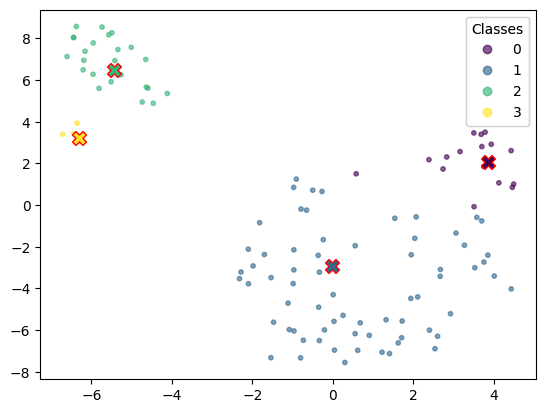

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed, post_train_label, and labelsNums are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np)

# Plot the data points
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labelsNums[:len(X_embedded)], s=10, cmap='viridis', alpha=0.6)

# Calculate class representatives
representatives = get_class_rep(post_train_embed, post_train_label)  # Make sure this function returns what you expect

# Get unique labels and their colors from the scatter plot
unique_labels = np.unique(labelsNums[:len(X_embedded)])
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# For each class representative, find the closest point and plot it
for i, rep in enumerate(representatives):
    if rep is not None:
        # Find the closest data point in the original space to this representative
        distances = np.linalg.norm(X_np - rep, axis=1)
        closest_point_index = np.argmin(distances)
        # Use the label of the closest data point to get the correct color
        label_of_closest = labelsNums[closest_point_index]
        color = scatter.cmap(scatter.norm(label_of_closest))
        plt.scatter(X_embedded[closest_point_index, 0], X_embedded[closest_point_index, 1], color=color, edgecolors='red', s=100, marker='X')

# You might want to adjust the legend to make sure it correctly represents your data
# plt.legend()
plt.show()


In [78]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming 'X_embedded' is your t-SNE result and 'labelsNums' are your labels

# # Silhouette Score:
# # - Measures how similar an object is to its own cluster compared to other clusters.
# # - Range: -1 (incorrect clustering) to 1 (highly dense clustering). 
# #   A score close to 1 means that the clusters are well separated and clearly defined.
# silhouette_avg = silhouette_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Silhouette Score: {silhouette_avg}")

# # Davies-Bouldin Index:
# # - Evaluates the clustering quality by measuring the average 'similarity' between each cluster 
# #   and its most similar one. The similarity is based on a ratio of within-cluster distances to between-cluster distances.
# # - Range: 0 to +∞. Lower scores indicate better clustering quality.
# davies_bouldin = davies_bouldin_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Calinski-Harabasz Index:
# # - Measures the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.
# # - Range: Higher values indicate better clustering quality, with no upper limit. Low values indicate clusters with high overlap.
# calinski_harabasz = calinski_harabasz_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")


In [79]:
from sklearn.metrics import f1_score
 # Create reverse mapping

count = 0

# Assuming val_dataset is iterable and has 'anchor' and 'label' keys
predicted_labels = []
true_labels = []

for item in val_dataset:
    count += 1
    input_vector = item['anchor']  # Your input vector for prediction
    
    # Get predicted cluster/label
    predicted_label_str = predict(input_vector)
    
    # Ensure predicted_label is in the valid range
    if predicted_label_str in label_to_int:
        predicted_label = label_to_int[predicted_label_str]
        predicted_labels.append(predicted_label)
    else:
        print(f"Warning: Encountered unknown predicted label {predicted_label_str}")
        continue

    # True label
    true_label_int = int(item['label'])  # Assuming 'label' contains the true label as integer
    if true_label_int in int_to_label:
        true_labels.append(true_label_int)
    else:
        print(f"Warning: Encountered unknown true label {true_label_int}")
        continue

    print(count, "Predicted:", predicted_label, "True:", true_label_int)

# Filter out any invalid entries where predicted or true labels are missing
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label and predicted_labels[i] in int_to_label]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

print("Loop completed")

# Calculate F1 Score, ignoring unknown labels
f1 = f1_score(filtered_true_labels, filtered_predicted_labels, average='weighted', zero_division=0)  # Adjust 'average' as necessary
print(f"F1 Score: {f1}")


1 Predicted: 0 True: 1
2 Predicted: 1 True: 1
3 Predicted: 1 True: 1
4 Predicted: 1 True: 1
5 Predicted: 1 True: 1
6 Predicted: 1 True: 2
7 Predicted: 0 True: 1
8 Predicted: 2 True: 2
9 Predicted: 1 True: 1
10 Predicted: 0 True: 0
11 Predicted: 0 True: 1
12 Predicted: 0 True: 0
13 Predicted: 1 True: 2
14 Predicted: 0 True: 1
15 Predicted: 1 True: 0
16 Predicted: 3 True: 3
17 Predicted: 1 True: 1
18 Predicted: 3 True: 1
19 Predicted: 1 True: 2
20 Predicted: 1 True: 0
21 Predicted: 1 True: 1
22 Predicted: 3 True: 2
23 Predicted: 2 True: 1
24 Predicted: 1 True: 3
25 Predicted: 1 True: 2
26 Predicted: 1 True: 1
27 Predicted: 0 True: 1
28 Predicted: 1 True: 1
29 Predicted: 0 True: 0
30 Predicted: 1 True: 1
Loop completed
F1 Score: 0.48692307692307696


              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.59      0.59      0.59        17
           2       0.50      0.17      0.25         6
           3       0.33      0.50      0.40         2

    accuracy                           0.50        30
   macro avg       0.45      0.46      0.42        30
weighted avg       0.52      0.50      0.49        30


 - Accuracy :  0.5
 - Precision :  0.52
 - Recall :  0.5
 - F1 score :  0.49
 - MCC :  0.19
 - AUC :  0.57


Performances by categories



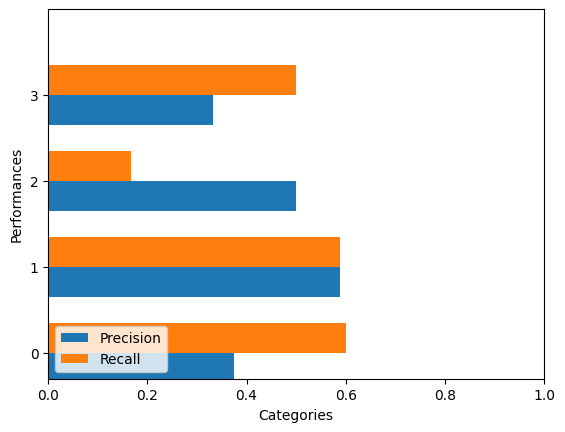



Confusion Matrix 


<AxesSubplot:>

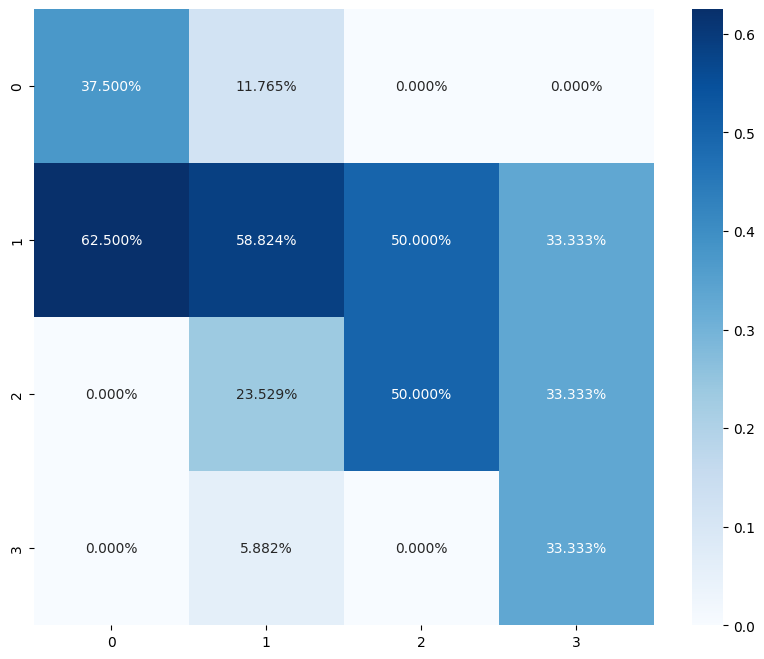

In [80]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

def multiclass_roc_auc_score(truth, pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

# Assuming predicted_labels and true_labels are already defined
predicted = predicted_labels
labels = true_labels

# Filter out 'unknown' labels
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
filtered_labels = [labels[i] for i in valid_indices]
filtered_predicted = [predicted[i] for i in valid_indices]

unique_labels = list(set(filtered_labels))
print(classification_report(filtered_labels, filtered_predicted))

print('\n - Accuracy : ', np.round(metrics.accuracy_score(filtered_labels, filtered_predicted), 2))
print(' - Precision : ', np.round(metrics.precision_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - Recall : ', np.round(metrics.recall_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - F1 score : ', np.round(metrics.f1_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - MCC : ', np.round(metrics.matthews_corrcoef(filtered_labels, filtered_predicted), 2))
print(' - AUC : ', np.round(multiclass_roc_auc_score(filtered_labels, filtered_predicted), 2))

print("\n\nPerformances by categories\n")

ind = np.arange(len(unique_labels)) 
width = 0.35
fig, ax = plt.subplots()
precision = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[0]
recall = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[1]
ax.barh(ind - width/2, precision, width, label='Precision')
ax.barh(ind + width/2, recall, width, label='Recall')
ax.set(yticks=ind, yticklabels=np.array(unique_labels), ylim=[2*width - 1, len(ind)])
plt.xlim(0, 1)
ax.legend(loc='lower left')
ax.set_ylabel("Performances")
ax.set_xlabel("Categories")
plt.show()

print("\n\nConfusion Matrix ")

mat = confusion_matrix(filtered_labels, filtered_predicted, labels=unique_labels)
df_cm = pd.DataFrame(mat, index=[i for i in unique_labels], columns=[i for i in unique_labels])
plt.figure(figsize=(10, 8))
sn.heatmap(df_cm / np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')


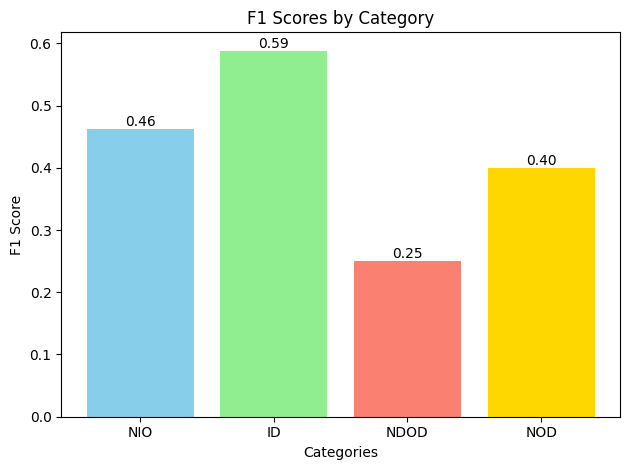

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
shortened_labels = {
    'OD': 'OD',
    'NIO': 'NIO',
    'ID': 'ID',
    'NDOD': 'NDOD',
    'NOD': 'NOD',
    'UD': 'UD'
}
# Assuming you have the predicted and true labels as per your previous code
# predicted_labels and true_labels should be lists of labels
# Filter out invalid labels from both true and predicted labels
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label.keys() and predicted_labels[i] in int_to_label.keys()]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

# Calculate F1 scores for each category
f1_scores = []
categories = list(int_to_label.keys())
for category in categories:
    true_bin = [1 if label == category else 0 for label in filtered_true_labels]
    pred_bin = [1 if label == category else 0 for label in filtered_predicted_labels]
    f1 = f1_score(true_bin, pred_bin, zero_division=0)
    f1_scores.append(f1)

# Define vibrant colors for each category
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Create bar plot with shortened category names and vibrant colors
shortened_categories = [shortened_labels[int_to_label[category]] for category in categories]
fig, ax = plt.subplots()
bars = ax.bar(shortened_categories, f1_scores, color=colors)

# Add F1 scores on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points", ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Category')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [82]:
# file_path = 'test_data_predictions.csv'

# # Load the compressed CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Extract the 'TrueLabel' and 'PredictedLabel' columns into separate variables
# labels_flaky = df['TrueLabel'].tolist()
# predicted_flaky = df['PredictedLabel'].tolist()

# print (classification_report(labels, predicted))

# print('\n - Accuracy : ' , np.round( metrics.accuracy_score(labels_flaky,  predicted_flaky) , 2))
# print(' - Precision : ' , np.round( metrics.precision_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - Recall : ' , np.round( metrics.recall_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - F1 score : ' , np.round( metrics.f1_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - MCC : ' , np.round( metrics.matthews_corrcoef(labels_flaky,  predicted_flaky) , 2))
# print(' - AUC : ' , np.round( multiclass_roc_auc_score(labels_flaky,  predicted_flaky),2) )

# print("\n\nPerfomnaces by categories\n")


# ind = np.arange(len(unique_labels)) 
# width = 0.35
# fig, ax = plt.subplots()
# precision = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[0]
# recall = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[1]
# ax.barh(ind - width/2, precision, width, label='Precision')
# ax.barh(ind + width/2, recall, width, label='Recall')
# ax.set(yticks=ind + width, yticklabels=np.array(unique_labels),
# ylim=[2*width - 1, len(ind)])
# plt.xlim(0,1)
# ax.legend(loc='upper right')
# ax.set_xlabel("Performances")
# ax.set_ylabel("Categories")
# plt.show()

# print("\n\nConfusion Matrix ")

# mat = confusion_matrix(labels_flaky,  predicted_flaky, labels=unique_labels)
# df_cm = pd.DataFrame(mat, index = [i for i in unique_labels], columns = [i for i in unique_labels])
# plt.figure(figsize = (10,8))
# sn.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')

In [83]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# precision_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[0]
# recall_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[1]
# # And assuming 'unique_labels' is defined as before

# ind = np.arange(len(unique_labels))  # the x locations for the groups
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the figure size as needed

# # Using a set of contrasting, darker colors
# colors = ['blue', 'green', 'red', 'orange']

# # Plotting Precision and Recall for Your Model
# rects1 = ax.bar(ind - width*1.5, precision_our_model, width, label='Our Precision', color=colors[0])
# rects2 = ax.bar(ind - width/2, recall_our_model, width, label='Our Recall', color=colors[1])

# # Plotting Precision and Recall for Flaky Model
# rects3 = ax.bar(ind + width/2, precision_flaky, width, label='FlakyCat Precision', color=colors[2])
# rects4 = ax.bar(ind + width*1.5, recall_flaky, width, label='FlakyCat Recall', color=colors[3])

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Class-wise Precision and Recall for Our Model vs. FlakyCat Model')
# ax.set_xticks(ind)
# ax.set_xticklabels(unique_labels, rotation=45, ha="right")  # Rotate for better label visibility
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the figure

# # Optional: Adding scores above bars
# ax.bar_label(rects1, padding=3, fmt='%.2f')
# ax.bar_label(rects2, padding=3, fmt='%.2f')
# ax.bar_label(rects3, padding=3, fmt='%.2f')
# ax.bar_label(rects4, padding=3, fmt='%.2f')

# fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend outside

# plt.show()


In [84]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming metrics have been calculated and stored in variables for both models.
# # Example metric variables: accuracy, precision, recall, f1_score, mcc, auc for the original model
# # And similarly named variables with a '_flaky' suffix for the comparison model.

# metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']
# your_model_metrics = [
#     np.round(metrics.accuracy_score(labels, predicted), 2),
#     np.round(metrics.precision_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.recall_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.f1_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels, predicted), 2),
#     np.round(multiclass_roc_auc_score(labels, predicted), 2)
# ]

# flaky_model_metrics = [
#     np.round(metrics.accuracy_score(labels_flaky, predicted_flaky), 2),
#     np.round(metrics.precision_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.recall_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.f1_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels_flaky, predicted_flaky), 2),
#     np.round(multiclass_roc_auc_score(labels_flaky, predicted_flaky), 2)
# ]

# x = np.arange(len(metrics_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, your_model_metrics, width, label='Our Model')
# rects2 = ax.bar(x + width/2, flaky_model_metrics, width, label='FlakyCat Model')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Metrics Comparison between Our Model and FlakyCat Model')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics_labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()


In [85]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# def extract_projections(siamese_network, dataloader):
#     projections = []
#     labels = []
#     for batch in dataloader:
#         label = batch["label"]
#         anchor = batch["anchor"]
#         projection = siamese_network(anchor)
        
#         projections.append(projection.cpu().detach().numpy())
#         labels.append(label.numpy())
#     projections = np.vstack(projections)
#     labels = np.hstack(labels)
#     return projections, labels

In [86]:
# projections, labels = extract_projections(siamese_network, train_dataloader)
# val_projections, val_labels = extract_projections(siamese_network, val_dataloader)

In [87]:
# print(len(projections), len(train_dataloader))

In [88]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(projections, labels)

# # Train SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(projections, labels)

In [89]:
# # Evaluate Random Forest Classifier
# rf_predictions = rf_classifier.predict(val_projections)
# rf_accuracy = accuracy_score(val_labels, rf_predictions)
# rf_f1 = f1_score(val_labels, rf_predictions, average='weighted')
# print(f"Random Forest Classifier Accuracy: {rf_accuracy}, F1: {rf_f1}")

# # Evaluate SVM Classifier
# svm_predictions = svm_classifier.predict(val_projections)
# svm_accuracy = accuracy_score(val_labels, svm_predictions)
# svm_f1 = f1_score(val_labels, svm_predictions, average='weighted')
# print(f"SVM Classifier Accuracy: {svm_accuracy}, F1:{svm_f1}")